In [1]:
#
# Created on Fri Nov 24 2023 00:57:09
# Author: Mukai (Tom Notch) Yu
# Email: myual@connect.ust.hk
# Affiliation: Hong Kong University of Science and Technology
#
# Copyright Ⓒ 2023 Mukai (Tom Notch) Yu
#
import torch
from matplotlib import pyplot as plt

from utils.files import read_file, print_dict
from dataloader.feature_extractor import FeatureExtractor
from dataloader.perspective_warper import PerspectiveWarper
from dataloader.general import FeatureMatchingDataLoader
from dataloader.visualization import visualize_matches

In [2]:
config = read_file("./configs/default.yaml")
print_dict(config)

train: 
  num_epochs: 100
  learning_rate: 0.0001
  output_dir: dump_match_pairs/
  dataset: 
    batch_size: 6
    shuffle: False
    COCO: 
      path: ./COCO2014/train2014
      fraction: 0.01
      resize: [640, 480]
      fix_warp: False
eval: 
  input_dir: assets/scannet_sample_images/
  output_dir: ./dump_match_pairs/
  input_pairs: assets/scannet_sample_pairs_with_gt.txt
  eval_interval: 5
  dataset: 
    batch_size: 32
    shuffle: False
    COCO: 
      path: ./COCO2014/eval2014
      fraction: 0.01
      resize: [640, 480]
      fix_warp: True
feature_extraction: 
  max_keypoints: 48
  descriptor_dim: 128
  extractor: 
    SIFT: 
      contrast_threshold: 0.0001
      edge_threshold: 10
      sigma: 1.6
perspective_warper: 
  max_warp_match_pixel_distance: 2
  homography: 
    perturbation_threshold: 0.25
    random_rotation: True
model: 
  sinkhorn_iterations: 100
  descriptor_dim: 128
  match_threshold: 0.1
  max_keypoints: 48
  batch_size: 1
  keypoint_encoder: [32, 64, 1

In [3]:
feature_extractor = FeatureExtractor(config["feature_extraction"])
perspective_warper = PerspectiveWarper(config["perspective_warper"])

dataloader = FeatureMatchingDataLoader(
    config["train"]["dataset"], feature_extractor, perspective_warper
)

In [4]:
batch = next(iter(dataloader))

number of ground truth match pairs: 23
dict_keys(['image0', 'image1', 'image0_shape', 'image1_shape', 'keypoints0', 'keypoints1', 'descriptors0', 'descriptors1', 'scores0', 'scores1', 'partial_assignment_matrix'])
torch.Size([6, 48, 2])
torch.Size([6, 48])
torch.Size([6, 49, 49])


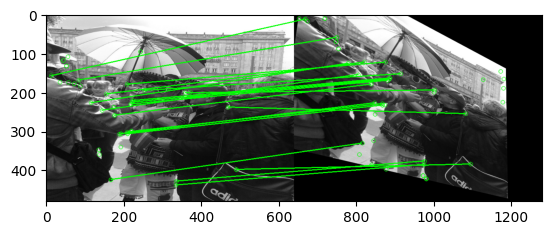

In [5]:
partial_assignment_matrix = batch["partial_assignment_matrix"]
print(
    "number of ground truth match pairs:",
    int(torch.sum(partial_assignment_matrix[0][:-1, :-1])),
)
print(batch.keys())
print(batch["keypoints0"].shape)
print(batch["scores0"].shape)
print(batch["partial_assignment_matrix"].shape)

plt.imshow(
    visualize_matches(
        batch["image0"][0],
        batch["image1"][0],
        batch["keypoints0"][0],
        batch["keypoints1"][0],
        batch["partial_assignment_matrix"][0],
    )
)